### NeoStats - Python for Data Science
Introduction to Python Language (Python 3)

In this notebook we will cover the following:
- Data Wrangling with Pandas 
- Advanced Numpy
- Strings and Text

#### 1. Data Wrangling

Data Wrangling process is defined as process in which we do the following: 
1. Discovering: Before we can dive deeply, we must better understand what is in the data,
2. Structuring: This step means organizing the data for better analysis. A single column may turn into several rows, one column may become two.
3. Cleaning: In this step we decide what to do with erroneous data, outliers, missing values etc.
4. Enriching: Exploring what other additional data might be added to help with the analysis
5. Validating: Verifying data consistency, quality, and security.
6. Publishing: Making the data and insights easy to accesses and consume.

In [1]:
import numpy as np
import pandas as pd 

##### 1.1 About the Credit Card Dataset
- Credit Card customer acquisition
- Spend (Transaction) Data
- Payment Information 


In [2]:
customer_df = pd.read_excel("Credit Card Data.xlsx", sheet_name=0)
customer_df.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,47,BANGALORE,Gold,1500000,C1,Self Employed
1,2,A2,56,CALCUTTA,Silver,300000,C2,Salaried_MNC
2,3,A3,30,COCHIN,Platimum,540000,C3,Salaried_Pvt
3,4,A4,22,BOMBAY,Platimum,840084,C4,Govt
4,5,A5,59,BANGALORE,Platimum,420084,C5,Normal Salary


In [3]:
trans_df = pd.read_excel("Credit Card Data.xlsx", sheet_name=1)
trans_df.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,344054.980813
1,2,A1,2004-01-03,PETRO,935.495203
2,3,A1,2004-01-15,CLOTHES,8687.895474
3,4,A1,2004-01-25,FOOD,341.159711
4,5,A1,2005-01-17,CAMERA,3406.639477


In [4]:
payment_df = pd.read_excel("Credit Card Data.xlsx", sheet_name=2)
payment_df.head()

,SL No:,Customer,Month,Amount
0,1,A1,2006-05-15,2.308473e+05
1,2,A1,2005-08-27,1.835124e+03
2,3,A1,2004-03-07,4.858701e+03
3,4,A1,2005-03-01,1.360527e+06
4,5,A1,2004-02-14,1.902322e+05


In [5]:
# Any missing values?
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No        100 non-null    int64 
 1   Customer  100 non-null    object
 2   Age       100 non-null    int64 
 3   City      100 non-null    object
 4   Product   100 non-null    object
 5   Limit     100 non-null    int64 
 6   Company   100 non-null    object
 7   Segment   100 non-null    object
dtypes: int64(3), object(5)
memory usage: 6.4+ KB


In [6]:
#Let's check if the data type is correct
customer_df.dtypes

No           int64
Customer    object
Age          int64
City        object
Product     object
Limit        int64
Company     object
Segment     object
dtype: object

In [7]:
customer_df.Age.describe()

count    100.000000
mean      46.460000
std       17.816925
min       14.000000
25%       30.000000
50%       47.500000
75%       62.250000
max       75.000000
Name: Age, dtype: float64

######  Age can't be less than 18. In case age is less than 18, let's replace it with mean of age values.

In [8]:
#df.loc[ condition, column]

customer_df.loc[(customer_df.Age < 18),'Age']=customer_df.Age.mean()
customer_df.Age.describe()

count    100.000000
mean      47.393800
std       16.946251
min       18.000000
25%       33.000000
50%       47.500000
75%       62.250000
max       75.000000
Name: Age, dtype: float64

In [9]:
#let's peek into the transactions
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Sl No:    1505 non-null   int64         
 1   Customer  1504 non-null   object        
 2   Month     1502 non-null   datetime64[ns]
 3   Type      1505 non-null   object        
 4   Amount    1502 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 58.9+ KB


In [11]:
# Let's drop the 2 rows with missing values
trans_df.dropna(how="any",axis=0, inplace=True)                                       
trans_df.info()                                            # What's wrong with this?? 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Sl No:    1500 non-null   int64         
 1   Customer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Type      1500 non-null   object        
 4   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 70.3+ KB


In [12]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Sl No:    1500 non-null   int64         
 1   Customer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Type      1500 non-null   object        
 4   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 70.3+ KB


In [13]:
trans_df.dtypes

Sl No:               int64
Customer            object
Month       datetime64[ns]
Type                object
Amount             float64
dtype: object

##### How many customers are there?

In [14]:
trans_df.Customer.nunique()

100

##### What are the spend categories? 

In [15]:
trans_df.Type.value_counts()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
SHOPPING        113
BUS TICKET       99
CLOTHES          95
JEWELLERY        95
MOVIE TICKET     76
RENTAL           76
BIKE             49
AUTO             40
CAR              30
SANDALS          28
Name: Type, dtype: int64

##### Which category has the highest average spend?

In [16]:
trans_df.groupby("Type")['Amount'].mean().sort_values(ascending=False).round(2)

Type
CAR             409143.47
AIR TICKET      254632.19
JEWELLERY       239218.69
BIKE            210701.27
AUTO             27320.76
CLOTHES          25140.16
CAMERA           21499.80
RENTAL           13106.51
BUS TICKET       12681.03
SHOPPING          7394.33
SANDALS           2516.63
MOVIE TICKET      1875.30
TRAIN TICKET      1627.49
PETRO              549.48
FOOD               341.17
Name: Amount, dtype: float64

In [18]:
#Are air tickets this expensive??
trans_df[trans_df['Type'] == 'AIR TICKET'].sample(5)

,Sl No:,Customer,Month,Type,Amount
617,618,A27,2005-02-01,AIR TICKET,293073.468809
1053,1054,A43,2005-02-01,AIR TICKET,297315.073489
1300,1301,A58,2004-01-25,AIR TICKET,287118.692226
1244,1245,A60,2005-06-01,AIR TICKET,123992.757551
741,742,A35,2006-03-29,AIR TICKET,184598.845487


In [19]:
trans_df[trans_df['Type'] == 'JEWELLERY'].sample(5)

,Sl No:,Customer,Month,Type,Amount
879,880,A28,2004-02-05,JEWELLERY,174222.088351
1433,1434,A46,2004-03-19,JEWELLERY,156577.195383
876,877,A25,2005-01-17,JEWELLERY,145186.789286
1373,1374,A44,2006-12-03,JEWELLERY,414053.781738
203,204,A4,2004-01-12,JEWELLERY,167875.828879


##### What is the average monthly spend by product categories? 

In [20]:
#lets create an actual month column from timestamp
trans_df.rename(columns={'Month':'TransDate'}, inplace=True)

In [21]:
trans_df['Month'] = trans_df['TransDate'].apply(lambda x:x.month)
trans_df['Year'] = trans_df['TransDate'].apply(lambda x:x.year)

In [22]:
trans_df.sample(5)

,Sl No:,Customer,TransDate,Type,Amount,Month,Year
601,602,A21,2006-03-03,AUTO,49325.410672,3,2006
537,538,A14,2004-01-25,AIR TICKET,332108.086033,1,2004
212,213,A13,2004-01-03,AIR TICKET,252495.314429,1,2004
156,157,A13,2005-06-03,TRAIN TICKET,3285.594220,6,2005
1145,1146,A48,2006-02-03,BIKE,34087.762919,2,2006


In [23]:
spend_df=trans_df.groupby(['Year','Month','Type'], as_index=False)['Amount'].mean().round(2)        #2 decimal places

In [24]:
spend_df.head()

,Year,Month,Type,Amount
0,2004,1,AIR TICKET,257735.68
1,2004,1,AUTO,16260.27
2,2004,1,BIKE,176136.06
3,2004,1,BUS TICKET,10181.61
4,2004,1,CAMERA,20912.67


In [25]:
# pivot the data - need multiple index so use pivot_table() instead of pivot()
spend_pivot = pd.pivot_table(spend_df, index=['Year','Month'], columns='Type', values='Amount')

In [26]:
spend_pivot.sample(5)

Type        AIR TICKET      AUTO       BIKE  BUS TICKET    CAMERA        CAR  \
Year Month                                                                     
2005 1       303015.61       NaN  213492.29         NaN  22898.55        NaN   
2004 11      209883.26       NaN  341651.68     5716.70       NaN  459281.33   
     5             NaN       NaN        NaN     2033.75       NaN        NaN   
2006 5       274384.02  25656.11        NaN         NaN  40368.97  361677.78   
2004 9             NaN       NaN        NaN     4813.98       NaN  389408.87   

Type         CLOTHES    FOOD  JEWELLERY  MOVIE TICKET   PETRO    RENTAL  \
Year Month                                                                
2005 1      11379.71  294.04  145186.79           NaN  706.23  22198.62   
2004 11          NaN  222.13        NaN           NaN  701.65       NaN   
     5           NaN  356.48   94116.63           NaN     NaN   9944.19   
2006 5           NaN  465.22   46430.20       1545.78  499.42  11171.27   
2004 9           NaN  330.85        NaN           NaN  522.57  17341.00   

Type        SANDALS  SHOPPING  TRAIN TICKET  
Year Month                                   
2005 1          NaN  18674.76           NaN  
2004 11         NaN       NaN           NaN  
     5       746.61       NaN       3329.75  
2006 5          NaN  10866.96       2424.86  
2004 9          NaN       NaN       2026.36

In [27]:
# Lets have a look at the repayment data
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SL No:    807 non-null    int64         
 1   Customer  807 non-null    object        
 2   Month     803 non-null    datetime64[ns]
 3   Amount    807 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 25.3+ KB


###### 4 rows have null in Month. Let's drop those.

In [28]:
payment_df.dropna(how="any",axis=0, inplace=True)                                       
payment_df.info()                                            # What's wrong with this?? 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 0 to 806
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SL No:    803 non-null    int64         
 1   Customer  803 non-null    object        
 2   Month     803 non-null    datetime64[ns]
 3   Amount    803 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 31.4+ KB


###### How many unique customers are there ?

In [29]:
payment_df.Customer.nunique()

100

##### Who are the top 10 customers in terms of repayment?

In [30]:
topcust_df = payment_df.groupby('Customer')['Amount'].sum().sort_values(ascending=False)
topcust_df.head(10)

Customer
A47    4.092247e+06
A61    2.776651e+06
A58    2.711600e+06
A56    2.372900e+06
A48    2.110238e+06
A36    2.068917e+06
A44    2.003032e+06
A24    1.998198e+06
A49    1.919454e+06
A42    1.841543e+06
Name: Amount, dtype: float64

##### How does spend compare to payment?

In [31]:
#Merge customer data with transaction data 
cust_trans_df = pd.merge(customer_df , trans_df , on = 'Customer' , how = 'left')

In [32]:
cust_trans_df.sample(5)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,TransDate,Type,Amount,Month,Year
1344,59,A59,74.0,BANGALORE,Silver,300009,C21,Normal Salary,1157,2004-01-12,FOOD,537.879790,1,2004
22,2,A2,56.0,CALCUTTA,Silver,300000,C2,Salaried_MNC,160,2005-09-03,JEWELLERY,141772.645597,9,2005
127,9,A9,63.0,CHENNAI,Silver,600000,C9,Govt,195,2006-03-27,FOOD,507.437171,3,2006
659,30,A30,69.0,BANGALORE,Gold,1500000,C12,Govt,708,2005-12-03,RENTAL,11713.575521,12,2005
1004,44,A44,36.0,DELHI,Gold,1500000,C6,Salaried_MNC,1084,2004-01-12,FOOD,403.147195,1,2004


##### Which customers are reaching the monthly limit? 

In [33]:
monthly_spend_df = trans_df.groupby(['Customer','Year','Month'], as_index=False)['Amount'].sum()

In [34]:
monthly_spend_df = pd.merge(customer_df, monthly_spend_df, on='Customer', how='left') 

In [35]:
monthly_spend_df["SpendRatio"] = monthly_spend_df.Amount/monthly_spend_df.Limit
monthly_spend_df.query("SpendRatio > 0.9").head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Year,Month,Amount,SpendRatio
4,1,A1,47.0,BANGALORE,Gold,1500000,C1,Self Employed,2005,2,1.360527e+06,0.907018
27,4,A4,22.0,BOMBAY,Platimum,840084,C4,Govt,2004,1,8.214110e+05,0.977772
38,5,A5,59.0,BANGALORE,Platimum,420084,C5,Normal Salary,2006,3,3.937892e+05,0.937406
131,13,A13,38.0,BANGALORE,Gold,500000,C13,Salaried_MNC,2006,11,4.624256e+05,0.924851
155,15,A15,41.0,CALCUTTA,Gold,500000,C15,Govt,2005,9,4.937968e+05,0.987594


In [36]:
monthly_spend_df.query("SpendRatio > 0.9")['Customer'].unique()

array(['A1', 'A4', 'A5', 'A13', 'A15', 'A16', 'A33', 'A48', 'A49', 'A52',
       'A53', 'A62', 'A69', 'A96', 'A99'], dtype=object)

##### Which city has the maximum spenders?

In [37]:
city_spend_df=monthly_spend_df.groupby(['City', 'Month'], as_index=False)['Amount'].sum().round(2) 

In [38]:
# reshape the data for plotting
df = city_spend_df.pivot(index='Month', columns='City', values='Amount')
df.head()

City,BANGALORE,BOMBAY,CALCUTTA,CHENNAI,COCHIN,DELHI,PATNA,TRIVANDRUM
Month,,,,,,,,
1,3126274.90,2328805.56,3244926.98,2597978.19,4617419.79,703130.98,1815232.34,814089.04
2,3971498.30,3008375.45,1658105.86,1969179.47,4149994.83,365936.54,751930.88,670849.37
3,2027004.09,2897458.18,2176908.20,1166274.69,2020514.68,1011287.40,1029935.01,881084.93
4,1337310.21,850195.62,1551686.80,1080791.32,2347582.32,1161682.99,148841.06,97370.19
5,3130804.91,778840.57,1967827.09,1924341.32,2844139.80,1072653.18,895786.43,1438594.96


<AxesSubplot:xlabel='Month'>

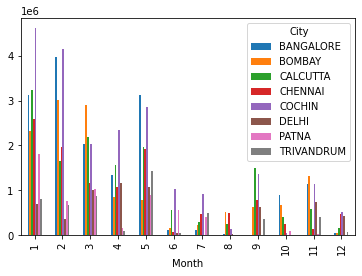

In [40]:
df.plot(kind='bar')

##### Which age group spends the most amount of money?

In [41]:
cust_trans_df["Age_group"] = pd.cut(x=cust_trans_df['Age'], bins=[18,30,60,100], labels=["GenX","Middle","Senior"])

In [42]:
cust_trans_df.sample(10)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,TransDate,Type,Amount,Month,Year,Age_group
797,37,A37,74.0,BANGALORE,Platimum,600018,C19,Normal Salary,1367,2006-05-03,AUTO,43770.897417,5,2006,Senior
1324,58,A58,68.0,CALCUTTA,Silver,3000000,C20,Normal Salary,1127,2004-11-23,PETRO,187.522013,11,2004,Senior
869,40,A40,64.0,CALCUTTA,Platimum,1500000,C22,Salaried_Pvt,776,2006-02-04,SHOPPING,5428.395579,2,2006,Senior
109,8,A8,50.0,PATNA,Silver,600000,C8,Salaried_Pvt,194,2006-03-26,FOOD,77.321412,3,2006,Middle
629,29,A29,72.0,CALCUTTA,Gold,1500000,C11,Salaried_Pvt,620,2005-02-28,TRAIN TICKET,2694.899420,2,2005,Senior
502,24,A24,39.0,DELHI,Silver,1200000,C6,Salaried_Pvt,847,2006-03-25,PETRO,678.443848,3,2006,Middle
957,43,A43,50.0,BANGALORE,Gold,1500000,C25,Self Employed,634,2006-03-30,AIR TICKET,215181.378326,3,2006,Middle
1310,57,A57,40.0,TRIVANDRUM,Silver,300003,C19,Normal Salary,1271,2005-02-23,SHOPPING,10205.759339,2,2005,Middle
773,37,A37,74.0,BANGALORE,Platimum,600018,C19,Normal Salary,686,2005-08-12,FOOD,598.177630,8,2005,Senior
626,29,A29,72.0,CALCUTTA,Gold,1500000,C11,Salaried_Pvt,572,2005-05-07,JEWELLERY,272882.733973,5,2005,Senior


In [43]:
spend_age_df = cust_trans_df.groupby('Age_group')['Amount'].sum()
spend_age_df

Age_group
GenX      1.807039e+07
Middle    4.398701e+07
Senior    3.020665e+07
Name: Amount, dtype: float64

##### Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

##### If the monthly rate of interest is 3.2%, what is the profit for the bank for each month? 
- Profit is defined as interest earned on Monthly Profit
    - Monthly Profit = Monthly spend – Monthly repayment. 
- Interest is earned only on positive profits and not on negative amounts

#### 2. Advanced Numpy 
- The ndarray internally consists of the following:
    - A pointer to data, that is a block of system memory
    - The data type or dtype
    - A tuple indicating the array’s shape; For example, a 10 by 5 array would have shape(10, 5)
    - A tuple of strides, integers indicating the number of bytes to “step” in order to advance one element along a dimension

In [ ]:
# numpy.concatenate takes a sequence (tuple, list, etc.) of arrays and joins them together in order along the input axis.
arr1 = np.array([[1, 2, 3], 
                 [4, 5, 6]])
arr2 = np.array([[7, 8, 9], 
                 [10, 11, 12]])

In [ ]:
np.concatenate([arr1, arr2], axis=0)                    #same as np.vstack()             

In [ ]:
np.concatenate([arr1, arr2], axis=1)                    #same as np.hstack()

In [ ]:
#split() splits an array 
from numpy.random import randn
bigarr = randn(10, 2)
bigarr

In [ ]:
one, two, three= np.split(bigarr, [3,6])               # axis = 0 , Split is [:3] , [3:6], [6:]

In [ ]:
one

In [ ]:
two

In [ ]:
three

In [ ]:
#reshape an array
arr = np.arange(15)
arr

In [ ]:
new_array = arr.reshape((5,-1))                                # -1 => infer the second dimension
new_array

In [ ]:
#flatten will flatten the array
new_array.flatten()

In [ ]:
arr

##### Broadcasting
- Broadcasting describes how arithmetic works between arrays of different shapes

In [ ]:
arr = np.arange(5)
arr

In [ ]:
arr * 4                                              # scalar value 4 has been broadcast to all the elements

In [ ]:
centered = arr - arr.mean(0)
centered

In [ ]:
#sorting
arr = randn(6)
arr

In [ ]:
arr.sort()                                           #no need on inplace      
arr

In [ ]:
arr2 = randn(3, 5)
arr2

In [ ]:
arr2[0,:].sort()                 # sort first row values in-place
arr2

##### Numpy Matrix 
- NumPy has a matrix class which behaves like a 2D array and retains this structure through operations
- multiplication with * is matrix multiplication, and ** is power

In [ ]:
X = np.matrix([[1, 2], [3, 4]])
X

In [ ]:
#Transpose
X.T

In [ ]:
#Inverse
X.I

In [ ]:
#Dot product 
X.I.dot(X).round(2)

In [ ]:
#trace of matrix
X.trace()

In [ ]:
Y = np.matrix([[1, 1], [2, 0]])
X*Y                                         #Matrix multiplication

In [ ]:
Y**3                                        #Matrix raised to 3 - remember Markov chain? 

#### String & Text - revisited
- There are two ways to store text data in pandas:
    - object -dtype NumPy array.
    - StringDtype extension type.
- Pandas provides a set of string functions which make it easy to operate on string data. 
- Most importantly, these functions ignore (or exclude) missing/NaN values.

In [ ]:
pd.Series(["a", "b", "c"])

In [ ]:
pd.Series(["a", "b", "c"], dtype=pd.StringDtype())

In [ ]:
s = pd.Series(['Tom', 'William Rick', 'John', 'Alber@t', np.nan, '1234','SteveSmith'])
print(s)

In [ ]:
print(s.str.upper())

In [ ]:
print(s.str.len())

In [ ]:
# Dummy variables 
basket = pd.Series(['Milk ','Bread','Eggs','Beer','Diaper'])
basket.str.get_dummies()

In [ ]:
#Replacing a substring with another 
kwrds = pd.Series(['#Data', '#Python', '#AI'])
kwrds

In [ ]:
kwrds.str.replace('#','@')

In [ ]:
#splitting strings based on a character
emails = pd.Series(['sachin@gmail.com ','kamal@outlook.com'])
emails.str.split('@', expand=True)

In [44]:
df = pd.DataFrame(np.random.randn(3, 2), 
                  columns=[" Column A ", " Column B "], 
                  index=range(3))
df

,Column A,Column B
0,1.334382,0.993231
1,-1.456032,0.534955
2,0.017939,-0.354274


In [45]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df

,column_a,column_b
0,1.334382,0.993231
1,-1.456032,0.534955
2,0.017939,-0.354274


In [ ]:
#Concatenation
slower = pd.Series(["a", "b", "c", "d"], dtype="string")
slower.str.cat(sep="_")

In [ ]:
supper = pd.Series(["A", "B", np.nan, "D"], dtype="string") 
supper.str.cat(slower)

In [ ]:
#Checking for a pattern match

pattern = r"[0-9][a-z]"        # a number followed by small letter

library = pd.Series(["1", "A2", "3a", "3b", "03cd", "4-d"], dtype="string")

library.str.contains(pattern)